# Import Packages

In [6]:
import xgi
import hypercontagion as hc
import matplotlib.pyplot as plt
import numpy as np
import random

# Set Up the Hypergraph
* Specify the number of nodes
* Specify the hyperdegree distribution
* Generates a configuration model of the hypergraph

In [7]:
n = 1000
k1 = {i : random.randint(5, 10) for i in range(n)}
k2 = {i : sorted(k1.values())[i] for i in range(n)}
H = xgi.chung_lu_hypergraph(k1, k2)

# Opinion Models
* Discrete state, random update (Voter model)
* Discrete state, deterministic update (Majority rule)
* Continuous state, random update (Deffuant-Weisbuch model)
* Continuous state, deterministic update (Hegelmann-Krause)

## Voter Model
* Binary opinion: For/Against or Yes/No
* Randomly choose a hyperedge and if a majority of neighbors believe the opposite, then you change your mind 

### Run simulation

In [8]:
yes_and_no = [random.choice(["Yes", "No"]) for i in range(n)]
yes_and_no = np.array(yes_and_no, dtype=object)
t, voter_model_states = hc.simulate_random_node_and_group_discrete_state(H, yes_and_no, tmin=0, tmax=10000)

### Plot Results

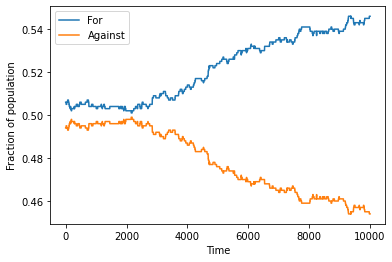

In [9]:
yes = np.count_nonzero(voter_model_states == "Yes", axis=0)
no = np.count_nonzero(voter_model_states == "No", axis=0)
plt.figure()
plt.plot(t, yes/n, label="For")
plt.plot(t, no/n, label="Against")
plt.xlabel("Time")
plt.ylabel("Fraction of population")
plt.legend()
plt.show()

## Deffuant-Weisbuch

$\epsilon$ is a "cautiousness" parameter

In [10]:
epsilon=0.3
initial_states = np.random.uniform(low=-1.0, high=1.0, size=n)
t, states_DW = hc.simulate_random_group_continuous_state_1D(H, initial_states, tmin = 0, tmax=2000, epsilon=epsilon)

### Plot Results

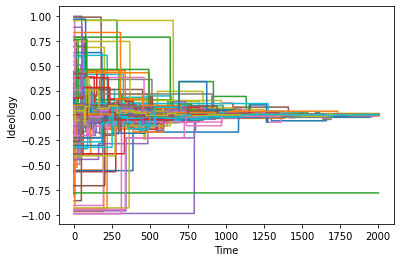

In [11]:
plt.figure()
plt.plot(t, states_DW[::10,:].T)
plt.xlabel("Time")
plt.ylabel("Ideology")
plt.show()

## Hegselmann-Krause

### Run Simulation

In [12]:
initial_states = np.random.uniform(low=-1.0, high=1.0, size=n)
t, states_HK = hc.synchronous_update_continuous_state_1D(H, initial_states, tmin=0, tmax=100)

### Plot Results

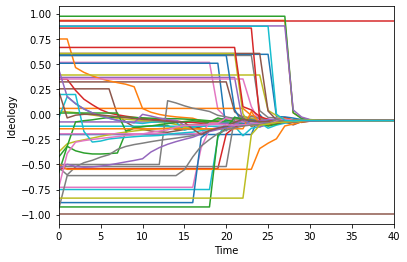

In [ ]:
plt.figure()
plt.plot(t, states_HK[::20,:].T)
plt.xlabel("Time")
plt.ylabel("Ideology")
plt.xlim([0, 40])
plt.show()